# QC report: HILICpos Rafi only samples (R5pos, R5neg & Naive)
- Minghao Gong; 07/27/2022
- This notebook specifically fits Asari run
- run with deduplicated samples (technical removed)

# Load libraries

In [4]:
# Let the middle rows included.
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)

In [3]:
#load libraries 
shhh <- suppressPackageStartupMessages # It's a library, so shhh!
shhh(library(FactoMineR))
shhh(library(factoextra))
shhh(library(reshape2))
shhh(library(tidyverse))
shhh(library(RColorBrewer))
shhh(library(gridExtra))
shhh(library(pheatmap))
library(repr)#jupyter notebook R ; image manipulation 
#shhh(library(devtools))
#install_github("vqv/ggbiplot")
shhh(library(ggbiplot))
options(warn=-1)#dont show warnings in Output 
options(digits = 14) # Or any higher number; fixing decimal places

library("rjson")

source('./utilis/utlis_MQC.R')

# Read tables

## load Metadata & feature table
- Here first use the peak Area table

# !!! What meta/feature/filtered tables in use?
- HILICpos

In [5]:
meta_path <- "../../../seq/RPneg_addgrp.csv"
featab_path <- "../../output/preproc_fultab_lab_targlist_79_rmTn750K/log2_hMinImp_TICn_groupFil0.3_RPneg_blkM_featab.csv"

#### Read metadata table

In [7]:
# metadata information
meta_df <- read.csv(meta_path)

In [8]:
head(meta_df)

Sample.Type File.Name                Sample.ID              Sample_ID_upd
1 Blank       Blank_20230308_002       Blank_20230308_002     Blank_1      
2 Blank       Blank_20230308_004       Blank_20230308_004     Blank_2      
3 Blank       Blank_std_20230308_1_002 Blank_std_20230308_002 Blank_std_1  
4 QC          MT_20230308_002          Qstd_20230308_002      Qstd_1       
5 QC          MT_20230308_004          Qstd_20230308_004      Qstd_2       
6 Unknown     MT_20230308_006          pooledsample_02        pooled_1     
  cell_number group     Comment
1 NR          Blank     1      
2 NR          Blank     1      
3 NR          Blank_std 1      
4 NR          Qstd      1      
5 NR          Qstd      1      
6 NA          pooled    1      
  Path                                                                                          
1 D:\\IDX_Data\\Maheshwor\\20220213_phosphatidylserine\\20230308_sample_analysis\\HILICpos_RPneg
2 D:\\IDX_Data\\Maheshwor\\20220213_phosphatidylserine\\20230308_sample_analysis\\HILICpos_RPneg
3 D:\\IDX_Data\\Maheshwor\\20220213_phosphatidylserine\\20230308_sample_analysis\\HILICpos_RPneg
4 D:\\IDX_Data\\Maheshwor\\20220213_phosphatidylserine\\20230308_sample_analysis\\HILICpos_RPneg
5 D:\\IDX_Data\\Maheshwor\\20220213_phosphatidylserine\\20230308_sample_analysis\\HILICpos_RPneg
6 D:\\IDX_Data\\Maheshwor\\20220213_phosphatidylserine\\20230308_sample_analysis\\HILICpos_RPneg
  Instrument.Method                                                                                   
1 C:\\Xcalibur\\methods\\MT\\phosphatidylserine_tSIM_method\\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS
2 C:\\Xcalibur\\methods\\MT\\phosphatidylserine_tSIM_method\\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS
3 C:\\Xcalibur\\methods\\MT\\phosphatidylserine_tSIM_method\\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS
4 C:\\Xcalibur\\methods\\MT\\phosphatidylserine_tSIM_method\\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS
5 C:\\Xcalibur\\methods\\MT\\phosphatidylserine_tSIM_method\\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS
6 C:\\Xcalibur\\methods\\MT\\phosphatidylserine_tSIM_method\\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS
  Process.Method Position Inj.Vol
1 NA             G:A1     2      
2 NA             G:A1     2      
3 NA             G:A2     2      
4 NA             G:A3     2      
5 NA             G:A3     2      
6 NA             G:A4     5

#### Read in the feature table
- Of note, since it is using tibble, row.names are suppressed; `COMP ID` comes as the first columns

In [12]:
asari_df <- read.csv(featab_path,row.names = 1)

In [13]:
asari2data_feat_df_regExpr <- function(asari_df,regExpr_sample_cols) {
    sample_col_index = grep(regExpr_sample_cols,colnames(asari_df))
    featab_df = asari_df[,c(1,sample_col_index)]
    return(featab_df)
}

asari2data_feat_df_index <- function(asari_df,end_index = 11) {
    featab_df = asari_df[,c(1,end_index:ncol(asari_df))]
    return(featab_df)
}

In [15]:
head(asari_df)

CD8TD_750K_1    CD8TD_750K_2    CD8stem_250K_1  CD8stem_300K_2 
F2  20.711927810406 23.437992984927 19.795498293574 21.426377295358
F4  19.437209545727 21.656510998578 20.579798183978 20.916956257108
F5  18.043676158118 20.027197757999 19.416031515662 19.933013712727
F6  19.509781768490 21.142005206488 20.334667175446 21.017517106734
F10 15.682747751144 15.682747751144 16.817325916832 15.682747751144
F11 15.743269755062 15.743269755062 18.533454052443 15.743269755062
    CD8trans_250K_2 CD8trans_350K_1 Tn_250K_1       Tn_250K_2      
F2  14.881687558870 20.912934187262 14.881687558870 15.924263289568
F4  20.836352995352 21.180707638182 20.325369028974 20.971847866836
F5  18.043676158118 19.813477324489 18.043676158118 18.043676158118
F6  19.509781768490 21.184804361604 19.509781768490 19.509781768490
F10 16.849989889871 15.682747751144 16.570907234391 16.959912842672
F11 18.279063692493 15.743269755062 17.567735795868 19.538867796008
    pooled_1        pooled_2        pooled_3       
F2  21.624641024883 21.636372822884 21.818457055735
F4  20.405914850550 20.906877387280 21.072210205226
F5  18.975149301063 19.818245129824 19.649480045499
F6  21.024161902446 21.081500992122 21.033562530539
F10 17.816061048152 15.682747751144 16.735559870176
F11 18.868950416332 18.120329015070 16.735862367462

In [18]:
featab_df = asari2data_feat_df_regExpr(asari_df,"CD8TD|CD8stem\\_[0-9]|Tn\\_[0-9]|CD8trans\\_[0-9]|pooled")

In [19]:
dim(featab_df)

[1] 9322   12

In [20]:
head(featab_df) # examine the table

CD8TD_750K_1    CD8TD_750K_1.1  CD8TD_750K_2    CD8stem_250K_1 
F2  20.711927810406 20.711927810406 23.437992984927 19.795498293574
F4  19.437209545727 19.437209545727 21.656510998578 20.579798183978
F5  18.043676158118 18.043676158118 20.027197757999 19.416031515662
F6  19.509781768490 19.509781768490 21.142005206488 20.334667175446
F10 15.682747751144 15.682747751144 15.682747751144 16.817325916832
F11 15.743269755062 15.743269755062 15.743269755062 18.533454052443
    CD8stem_300K_2  CD8trans_250K_2 CD8trans_350K_1 Tn_250K_1      
F2  21.426377295358 14.881687558870 20.912934187262 14.881687558870
F4  20.916956257108 20.836352995352 21.180707638182 20.325369028974
F5  19.933013712727 18.043676158118 19.813477324489 18.043676158118
F6  21.017517106734 19.509781768490 21.184804361604 19.509781768490
F10 15.682747751144 16.849989889871 15.682747751144 16.570907234391
F11 15.743269755062 18.279063692493 15.743269755062 17.567735795868
    Tn_250K_2       pooled_1        pooled_2        pooled_3       
F2  15.924263289568 21.624641024883 21.636372822884 21.818457055735
F4  20.971847866836 20.405914850550 20.906877387280 21.072210205226
F5  18.043676158118 18.975149301063 19.818245129824 19.649480045499
F6  19.509781768490 21.024161902446 21.081500992122 21.033562530539
F10 16.959912842672 17.816061048152 15.682747751144 16.735559870176
F11 19.538867796008 18.868950416332 18.120329015070 16.735862367462

### subset metadatabased on feature table
- make sure the below list is matchable at least subsets

In [32]:
colnames(featab_df)

[1] "CD8TD_750K_1"    "CD8TD_750K_1.1"  "CD8TD_750K_2"    "CD8stem_250K_1" 
 [5] "CD8stem_300K_2"  "CD8trans_250K_2" "CD8trans_350K_1" "Tn_250K_1"      
 [9] "Tn_250K_2"       "pooled_1"        "pooled_2"        "pooled_3"

In [33]:
pull(meta_df['Sample_ID_upd']) # tibble column needs to pull out into vector

[1] "pooled_1"        "Tn_250K_1"       "Tn_250K_2"       "CD8stem_250K_1" 
 [5] "CD8stem_300K_2"  "pooled_2"        "CD8trans_350K_1" "CD8trans_250K_2"
 [9] "CD8TD_750K_1"    "CD8TD_750K_2"    "pooled_3"

In [34]:
meta_df = meta_df[pull(meta_df['Sample_ID_upd']) %in% colnames(featab_df),]

In [35]:
dim(meta_df)

[1] 11 12

In [36]:
head(meta_df)

Sample.Type File.Name       Sample.ID            Sample_ID_upd  cell_number
6  Unknown     MT_20230308_006 pooledsample_02      pooled_1       NA         
7  Unknown     MT_20230308_008 Naive_250k_01_02     Tn_250K_1      250000     
8  Unknown     MT_20230308_010 Naive_250k_02_02     Tn_250K_2      250000     
11 Unknown     MT_20230308_016 CD8T_stem_250k_01_02 CD8stem_250K_1 250000     
12 Unknown     MT_20230308_018 CD8T_stem_300k_01_02 CD8stem_300K_2 300000     
13 Unknown     MT_20230308_020 pooledsample_04      pooled_2       NA         
   group   Comment
6  pooled  1      
7  Tn      1      
8  Tn      1      
11 CD8stem 1      
12 CD8stem 1      
13 pooled  1      
   Path                                                                                          
6  D:\\IDX_Data\\Maheshwor\\20220213_phosphatidylserine\\20230308_sample_analysis\\HILICpos_RPneg
7  D:\\IDX_Data\\Maheshwor\\20220213_phosphatidylserine\\20230308_sample_analysis\\HILICpos_RPneg
8  D:\\IDX_Data\\Maheshwor\\20220213_phosphatidylserine\\20230308_sample_analysis\\HILICpos_RPneg
11 D:\\IDX_Data\\Maheshwor\\20220213_phosphatidylserine\\20230308_sample_analysis\\HILICpos_RPneg
12 D:\\IDX_Data\\Maheshwor\\20220213_phosphatidylserine\\20230308_sample_analysis\\HILICpos_RPneg
13 D:\\IDX_Data\\Maheshwor\\20220213_phosphatidylserine\\20230308_sample_analysis\\HILICpos_RPneg
   Instrument.Method                                                                                   
6  C:\\Xcalibur\\methods\\MT\\phosphatidylserine_tSIM_method\\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS
7  C:\\Xcalibur\\methods\\MT\\phosphatidylserine_tSIM_method\\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS
8  C:\\Xcalibur\\methods\\MT\\phosphatidylserine_tSIM_method\\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS
11 C:\\Xcalibur\\methods\\MT\\phosphatidylserine_tSIM_method\\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS
12 C:\\Xcalibur\\methods\\MT\\phosphatidylserine_tSIM_method\\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS
13 C:\\Xcalibur\\methods\\MT\\phosphatidylserine_tSIM_method\\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS
   Process.Method Position Inj.Vol
6  NA             G:A4     5      
7  NA             G:B1     5      
8  NA             G:B2     5      
11 NA             G:B5     5      
12 NA             G:B6     5      
13 NA             G:A4     5

#### procedure for preoprocessing of data
- log2-transformation (currently the missing data is denoted by NA)
- Analysis the TIC
- Correlation heatmap

### Overall Density Distribution of data 
  

- first two columns are gona be mz and rt and rest should be the samples ; nothing else 

- two parameters needed : 
  - data : - Data can be log2(prefferably) /linear; if have nas will be imputed to calulate density
  
  - y_lim_param; to adjust height of y axis(desnity) in the plot; later to automate it may be 
  

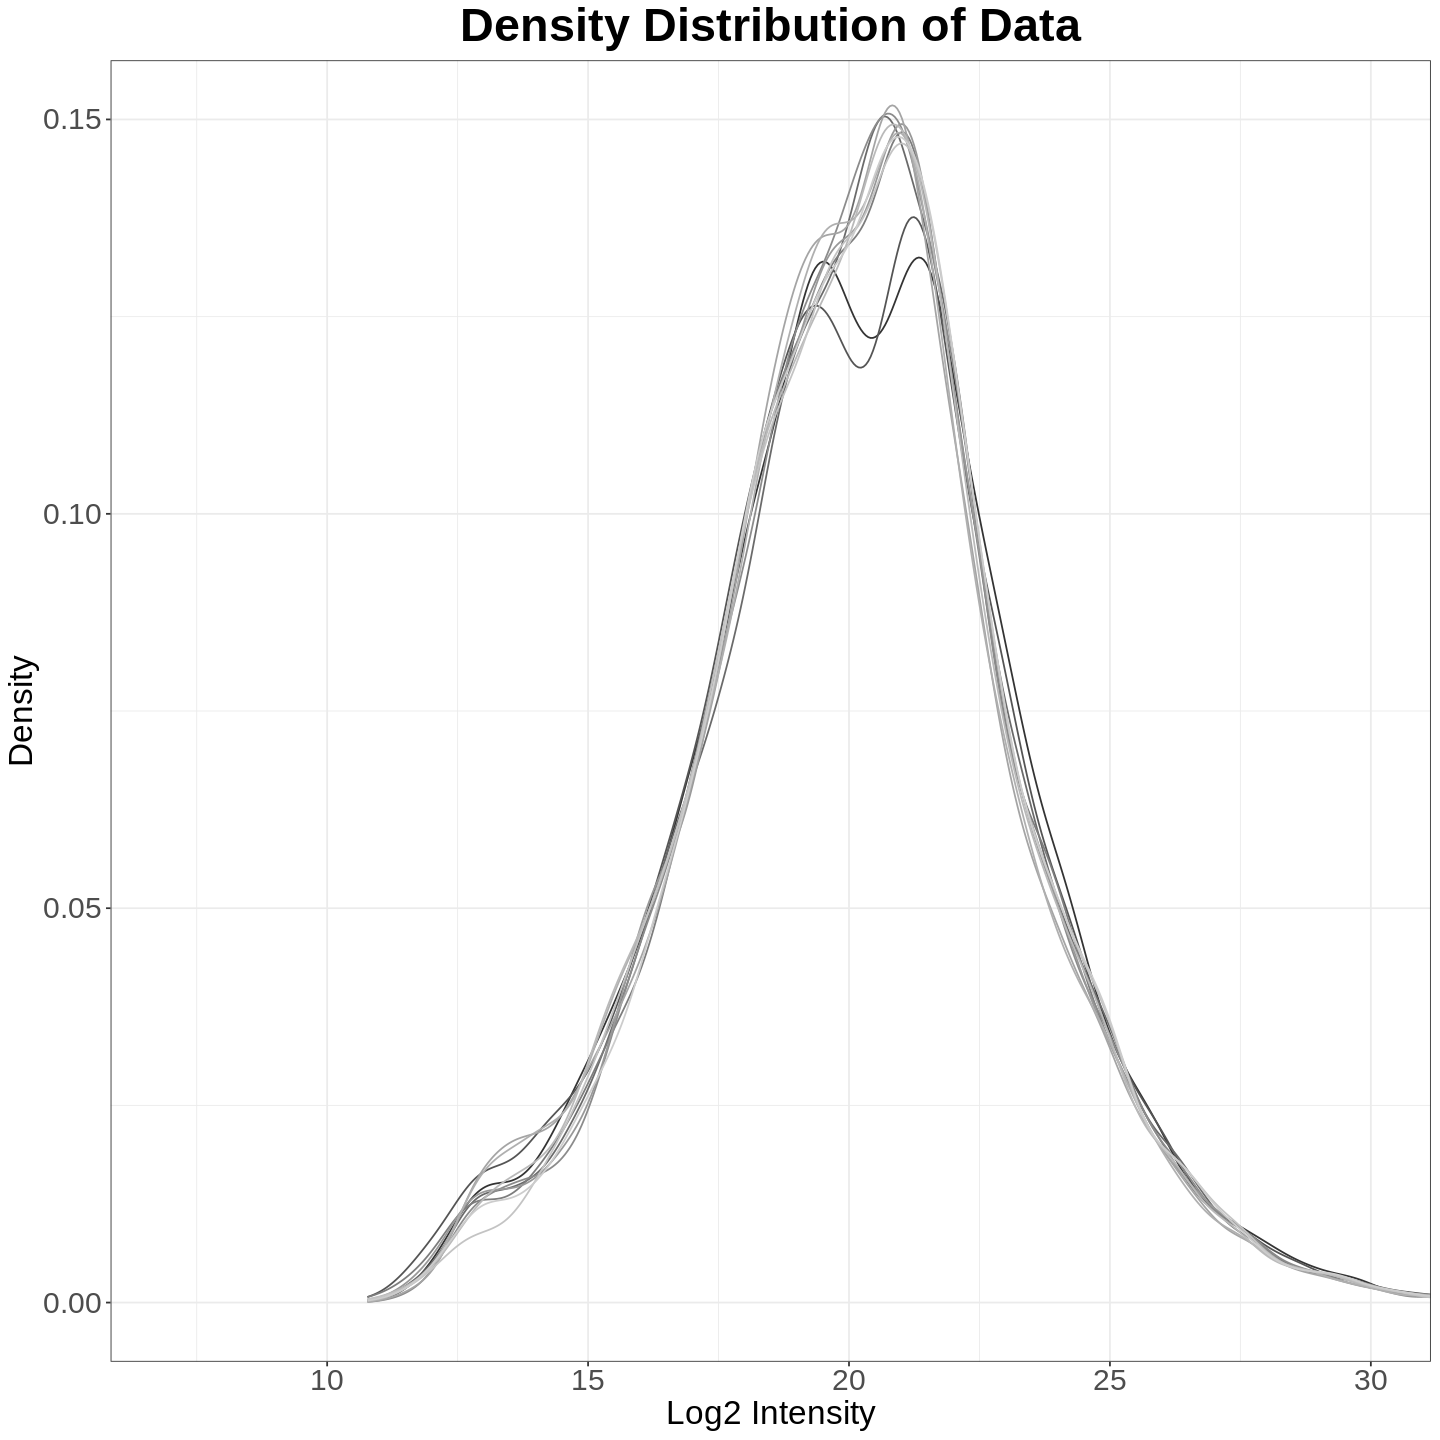

In [37]:
options(repr.plot.width=12, repr.plot.height=12, res=200)
suppressMessages(custom_density_plot(featab_df, 
                                     y_lim_param=0.15))

### Mean TIC ACross Samples 

Input:

- data ; if nas ; willl be imputed for 0s within the function because we need to take into account the missing values in each sample to properly detect low intensity samples 
- optional ; metadata ; if present will factor color it ; if not then will not 


Note ; if x-axis need be changed for fontsize ; use   axis.title.x = element_text( size=16) in plotMeanTic function to control;

In [38]:
meta_df

Sample.Type File.Name       Sample.ID             Sample_ID_upd  
6  Unknown     MT_20230308_006 pooledsample_02       pooled_1       
7  Unknown     MT_20230308_008 Naive_250k_01_02      Tn_250K_1      
8  Unknown     MT_20230308_010 Naive_250k_02_02      Tn_250K_2      
11 Unknown     MT_20230308_016 CD8T_stem_250k_01_02  CD8stem_250K_1 
12 Unknown     MT_20230308_018 CD8T_stem_300k_01_02  CD8stem_300K_2 
13 Unknown     MT_20230308_020 pooledsample_04       pooled_2       
14 Unknown     MT_20230308_022 CD8T_trans_350k_01_02 CD8trans_350K_1
15 Unknown     MT_20230308_024 CD8T_trans_250k_01_02 CD8trans_250K_2
16 Unknown     MT_20230308_026 CD8T_TD_750k_01_02    CD8TD_750K_1   
17 Unknown     MT_20230308_028 CD8T_TD_750k_01_02    CD8TD_750K_2   
18 Unknown     MT_20230308_030 pooledsample_06       pooled_3       
   cell_number group    Comment
6  NA          pooled   1      
7  250000      Tn       1      
8  250000      Tn       1      
11 250000      CD8stem  1      
12 300000      CD8stem  1      
13 NA          pooled   1      
14 350000      CD8trans 1      
15 250000      CD8trans 1      
16 750000      CD8TD    1      
17 750000      CD8TD    1      
18 NA          pooled   1      
   Path                                                                                          
6  D:\\IDX_Data\\Maheshwor\\20220213_phosphatidylserine\\20230308_sample_analysis\\HILICpos_RPneg
7  D:\\IDX_Data\\Maheshwor\\20220213_phosphatidylserine\\20230308_sample_analysis\\HILICpos_RPneg
8  D:\\IDX_Data\\Maheshwor\\20220213_phosphatidylserine\\20230308_sample_analysis\\HILICpos_RPneg
11 D:\\IDX_Data\\Maheshwor\\20220213_phosphatidylserine\\20230308_sample_analysis\\HILICpos_RPneg
12 D:\\IDX_Data\\Maheshwor\\20220213_phosphatidylserine\\20230308_sample_analysis\\HILICpos_RPneg
13 D:\\IDX_Data\\Maheshwor\\20220213_phosphatidylserine\\20230308_sample_analysis\\HILICpos_RPneg
14 D:\\IDX_Data\\Maheshwor\\20220213_phosphatidylserine\\20230308_sample_analysis\\HILICpos_RPneg
15 D:\\IDX_Data\\Maheshwor\\20220213_phosphatidylserine\\20230308_sample_analysis\\HILICpos_RPneg
16 D:\\IDX_Data\\Maheshwor\\20220213_phosphatidylserine\\20230308_sample_analysis\\HILICpos_RPneg
17 D:\\IDX_Data\\Maheshwor\\20220213_phosphatidylserine\\20230308_sample_analysis\\HILICpos_RPneg
18 D:\\IDX_Data\\Maheshwor\\20220213_phosphatidylserine\\20230308_sample_analysis\\HILICpos_RPneg
   Instrument.Method                                                                                   
6  C:\\Xcalibur\\methods\\MT\\phosphatidylserine_tSIM_method\\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS
7  C:\\Xcalibur\\methods\\MT\\phosphatidylserine_tSIM_method\\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS
8  C:\\Xcalibur\\methods\\MT\\phosphatidylserine_tSIM_method\\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS
11 C:\\Xcalibur\\methods\\MT\\phosphatidylserine_tSIM_method\\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS
12 C:\\Xcalibur\\methods\\MT\\phosphatidylserine_tSIM_method\\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS
13 C:\\Xcalibur\\methods\\MT\\phosphatidylserine_tSIM_method\\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS
14 C:\\Xcalibur\\methods\\MT\\phosphatidylserine_tSIM_method\\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS
15 C:\\Xcalibur\\methods\\MT\\phosphatidylserine_tSIM_method\\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS
16 C:\\Xcalibur\\methods\\MT\\phosphatidylserine_tSIM_method\\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS
17 C:\\Xcalibur\\methods\\MT\\phosphatidylserine_tSIM_method\\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS
18 C:\\Xcalibur\\methods\\MT\\phosphatidylserine_tSIM_method\\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS
   Process.Method Position Inj.Vol
6  NA             G:A4     5      
7  NA             G:B1     5      
8  NA             G:B2     5      
11 NA             G:B5     5      
12 NA             G:B6     5      
13 NA             G:A4     5      
14 NA             G:B7     5      
15 NA             G:B8     5      
16 NA             G:B9     5      
17 NA            

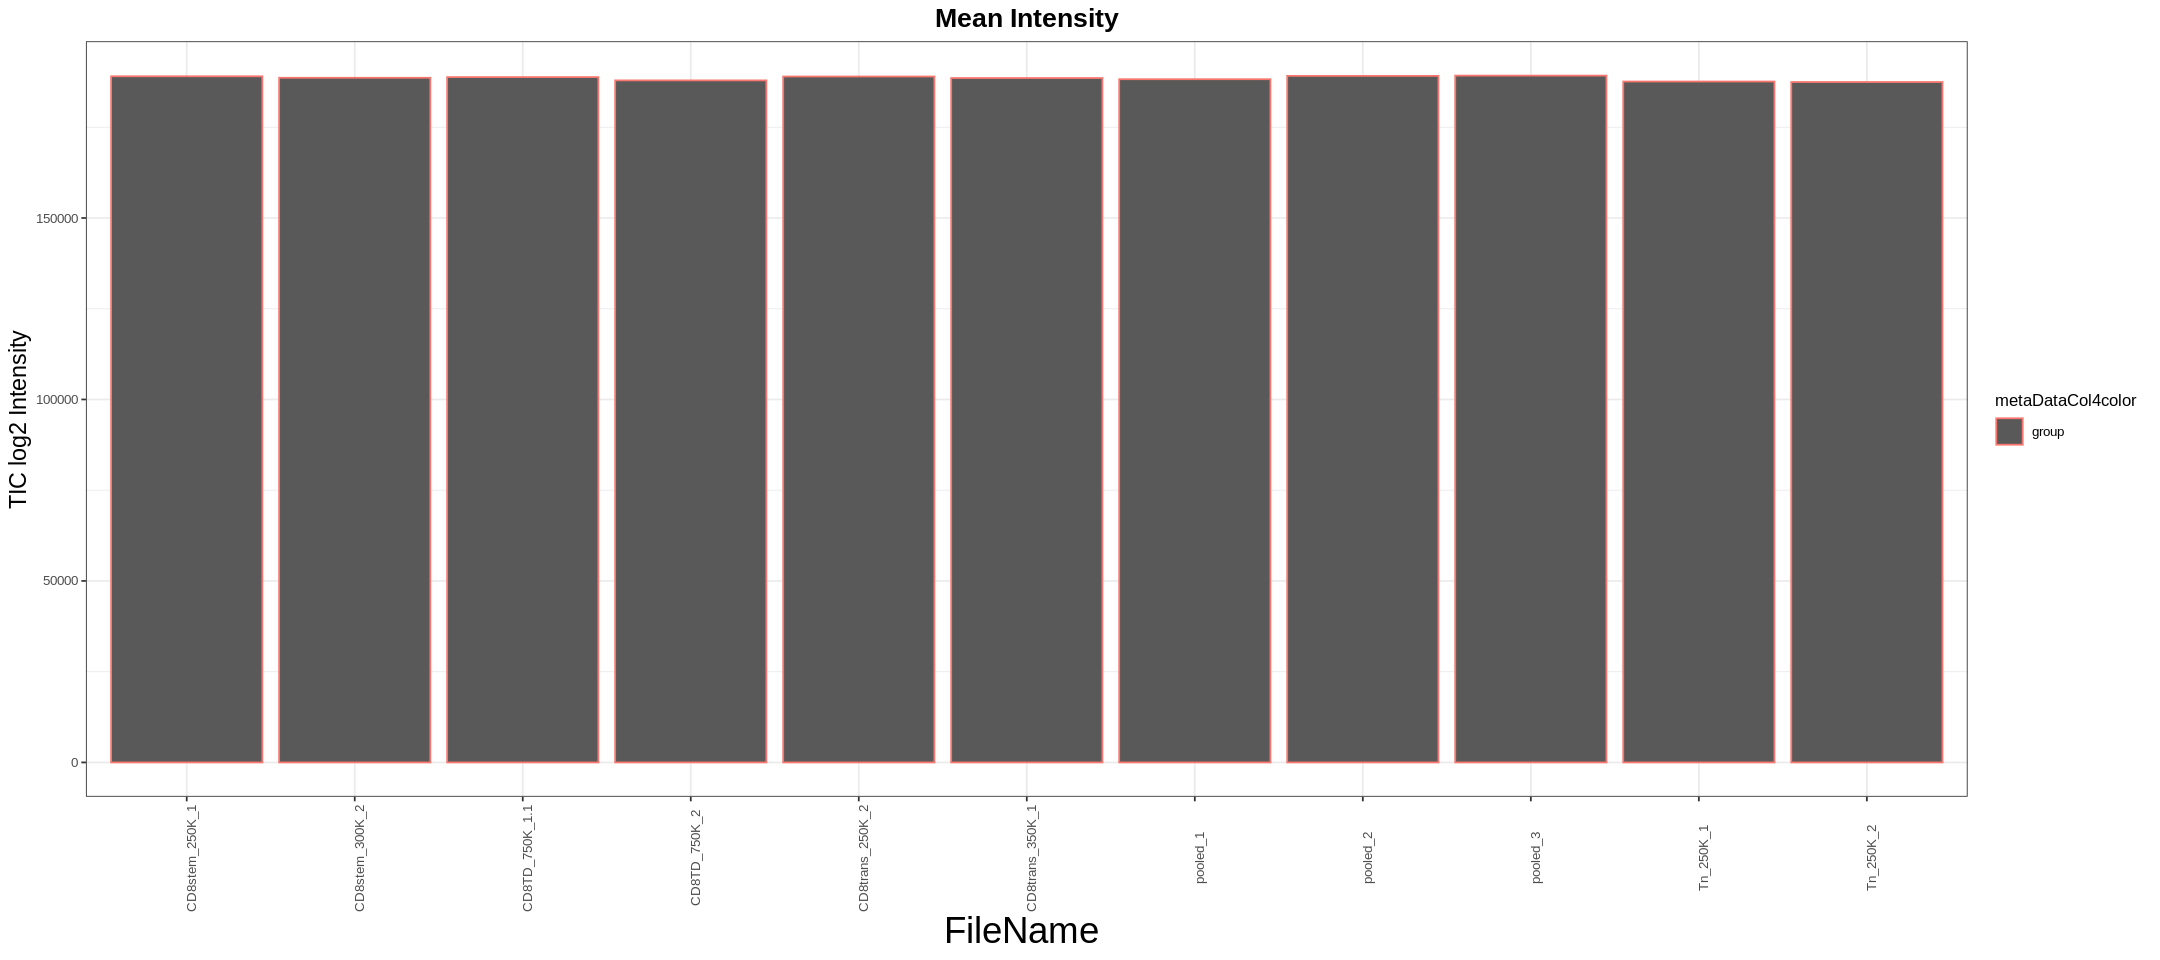

In [42]:
options(repr.plot.width=18, repr.plot.height=8, res=200)
suppressMessages(plotTIC(featab_df,meta_df,"Sample_ID_upd","group"))
#control xaxis font size;axis.title.x = element_text( size=16)

## Decide SD cutoff for outliers by yourself if need be

In [43]:
get_TIC_outliers(featab_df,2)

columnsum Sample.ID

### Missing values plot 

Input:

- logged 2/linear scale  data with nas ; no imputation happening in the function as i am counting Nas 


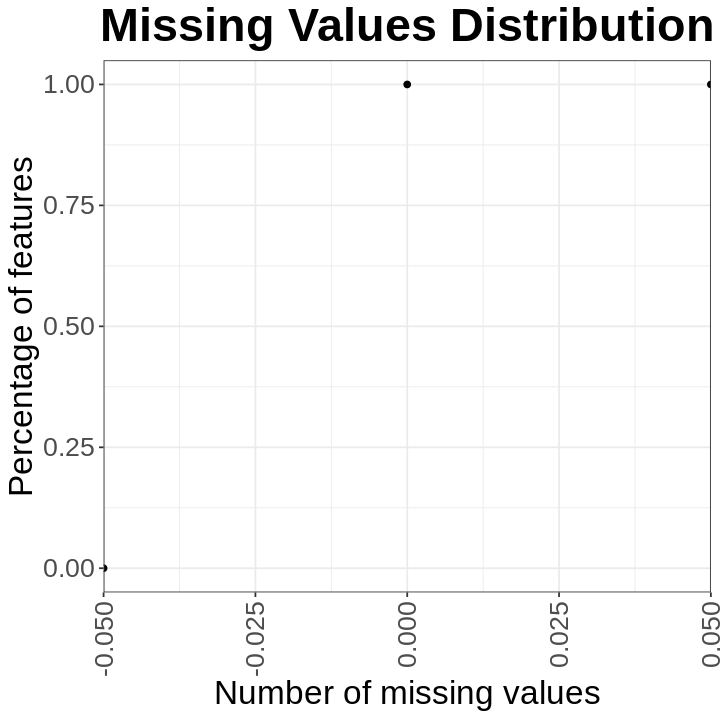

In [44]:
source('./utilis/utlis_MQC.R')
options(repr.plot.width=6, repr.plot.height=6, res=200)
plot_NA_cdf(featab_df, present_percentage = FALSE)

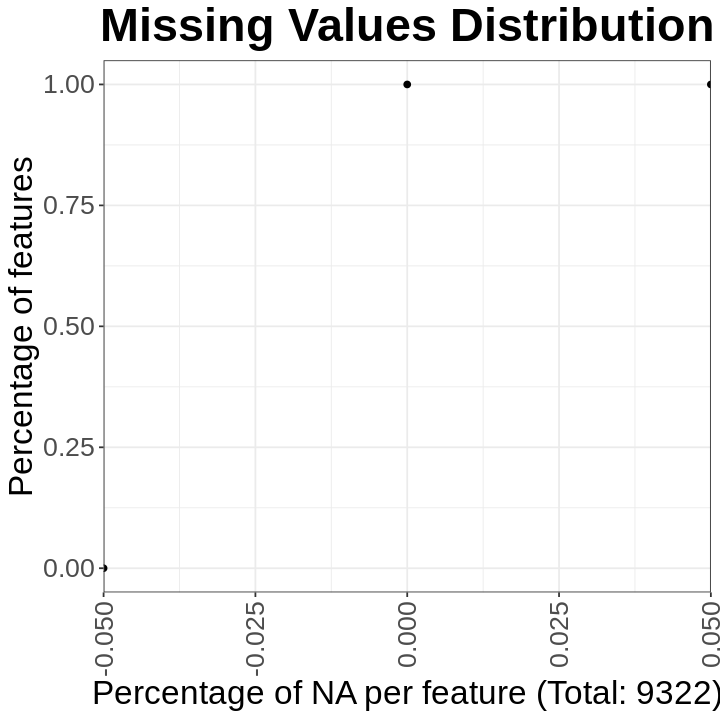

In [45]:
options(repr.plot.width=6, repr.plot.height=6, res=200)
plot_NA_cdf(featab_df, present_percentage = TRUE)

### Corelation bw samples 

In [46]:
# A function that help later step as correlation plot cannot handle very well with zero values
mssingValueAsNA <- TRUE # NA is good to skip this step
if (!mssingValueAsNA) {
    featab_df.NA <- featab_df
    featab_df.NA[featab_df == 0] <- NA  # Turn 0 into NA
    featab_df <- featab_df.NA
}

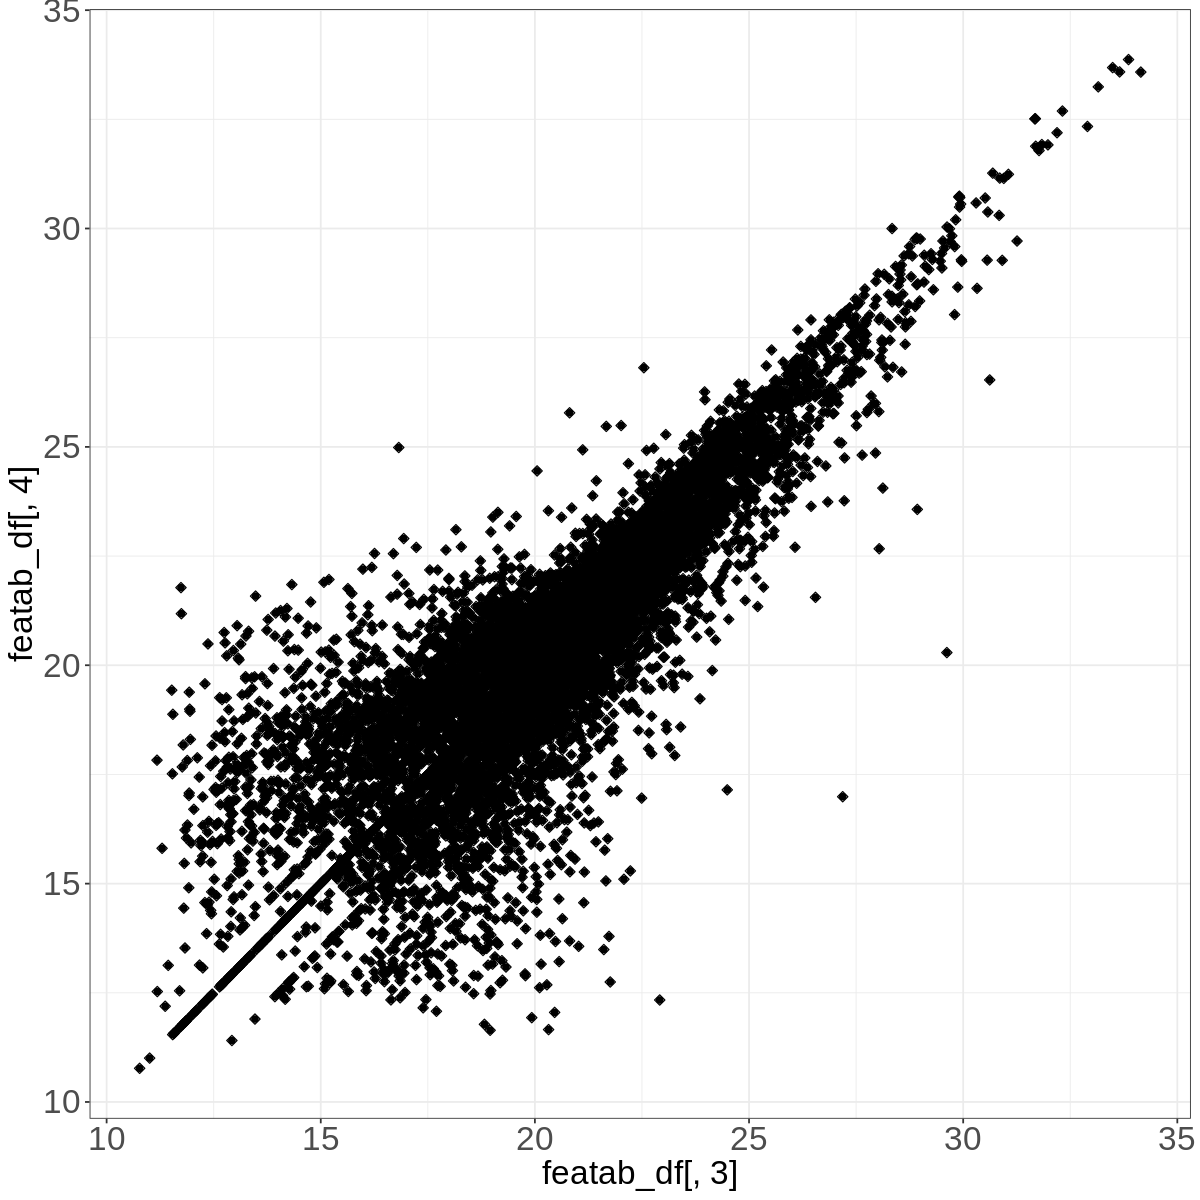

In [47]:
#options(repr.plot.width=16, repr.plot.height=20, res=200)
# reproducibility of injection replicates
#figure options ; change to the needs
options(repr.plot.width=10, repr.plot.height=10)
  ggplot(featab_df, aes(x=featab_df[,3], y=featab_df[,4])) + geom_point()+
  geom_point(size=2, shape=23) +# Change the point size, and shape
  theme_bw()+#axis settings 
    theme(axis.text=element_text(size=20))+
 #axis labels settings 
    theme(axis.title=element_text(size=20))

## Heatmap 

Input: 
- data; log2/linear scale data with nas 
- metadata is optional 
- metadata include what to colors.

WishList Note:  fix if metadata is not passed; debug

In [48]:
colnames(meta_df)

[1] "Sample.Type"       "File.Name"         "Sample.ID"        
 [4] "Sample_ID_upd"     "cell_number"       "group"            
 [7] "Comment"           "Path"              "Instrument.Method"
[10] "Process.Method"    "Position"          "Inj.Vol"

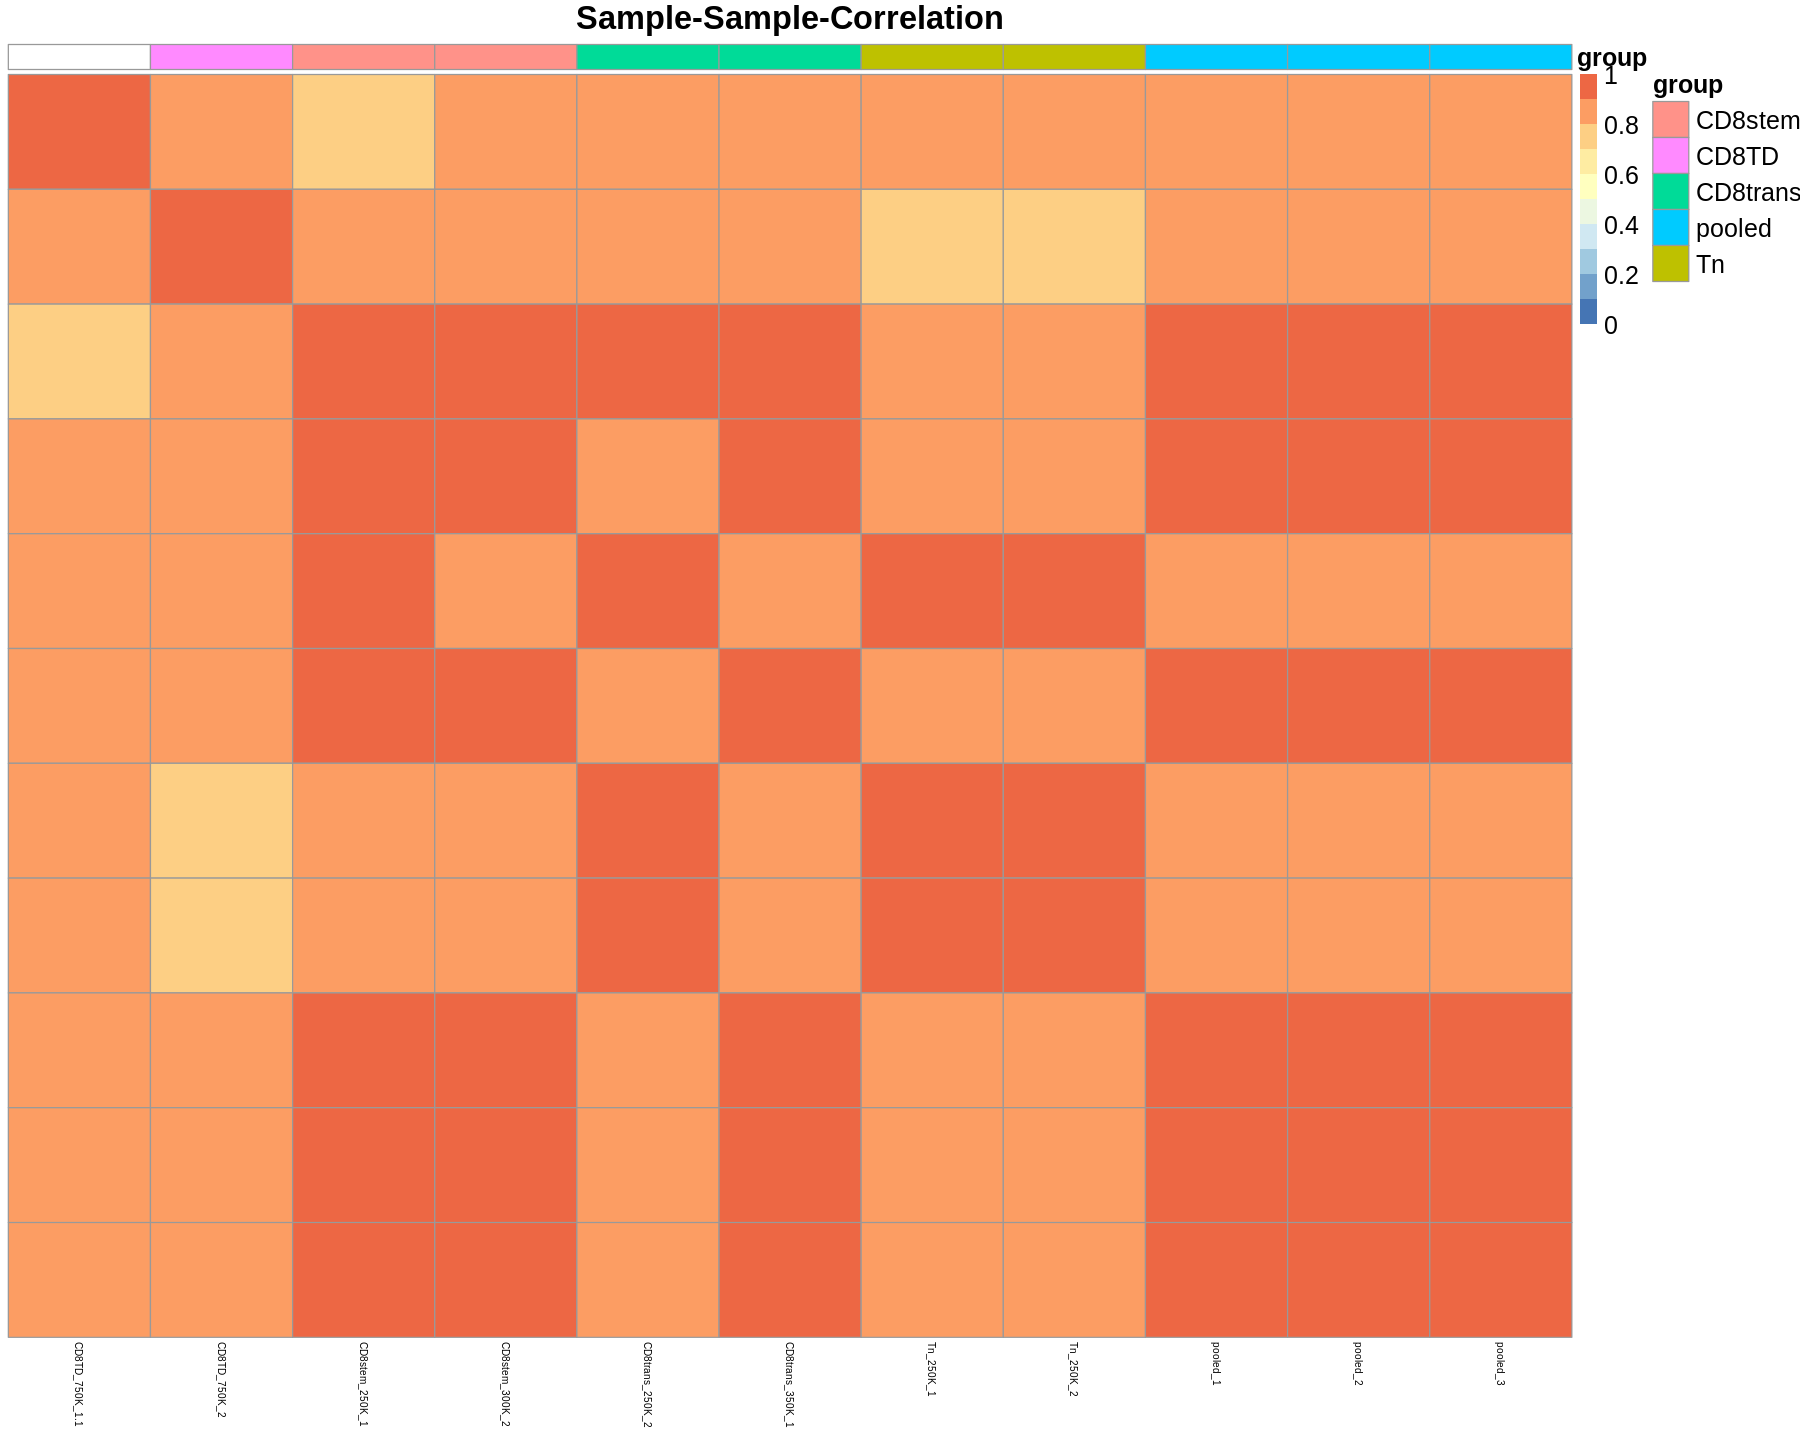

In [50]:
options(repr.plot.width=15, repr.plot.height=12, res=300)
suppressMessages(plot_heatmap(featab_df, meta_df, "Sample_ID_upd","group"))

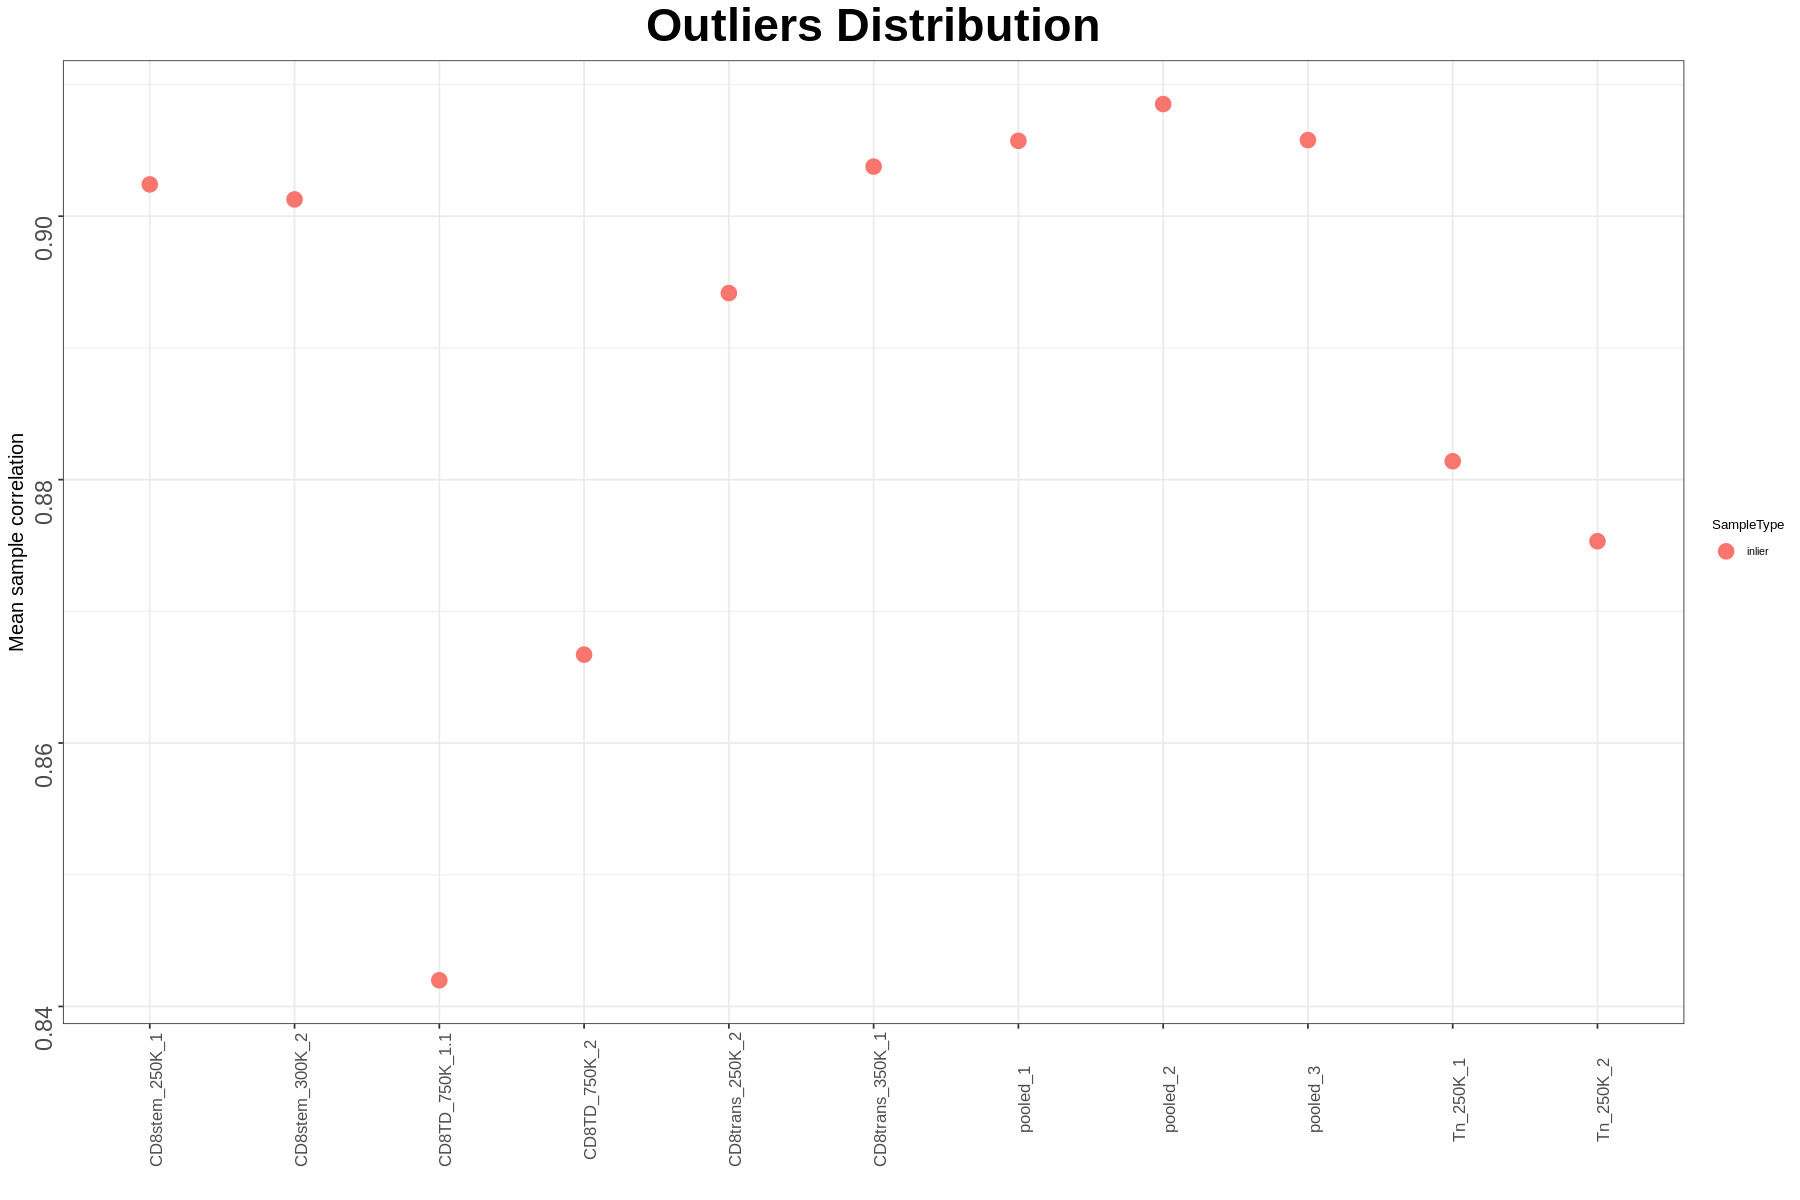

In [51]:
df.outliers <-  get_outliers_heatmap(featab_df)
options(repr.plot.width=15, repr.plot.height=10, res=300)
getoutliersplot(df.outliers)

In [52]:
filtered.df.outliers<-df.outliers %>% filter(SampleType=="outlier")
filtered.df.outliers

samples columnmeancor SampleType

------------

-----